In [2]:
import cv2
import sys
import csv
import dlib
import keras
import imutils
import argparse
import numpy as np
import pandas as pd
from imutils import face_utils
from keras.optimizers import Adam
from keras.activations import relu
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, Dense, Activation, Dropout
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, LeakyReLU
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
# for x in tqdm(list):

In [ ]:
# df = pd.read_csv('https://raw.githubusercontent.com/iparaskev/simple-blink-detector/master/train/dataset.csv')

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
# from keras.models import model_from_json
# vgg_face = model.load_weights('vgg_face_weights.h5')

In [ ]:
# vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
from keras.models import model_from_json
model.load_weights('mod5_data/vgg_face_weights.h5')


vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)


def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


# img1_representation = vgg_face_descriptor.predict(preprocess_image('1.jpg'))[0,:]
# img2_representation = vgg_face_descriptor.predict(preprocess_image('2.jpg'))[0,:]


def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

epsilon = 0.40 #cosine similarity
#epsilon = 120 #euclidean distance
 
def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]
 
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
 
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")

In [ ]:
epsilon = 0.40 #cosine similarity
# epsilon = 120 #euclidean distance
 
def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]

    plt.subplot(2,1,1)
    plt.imshow(load_img(img1,target_size=(224,244)))
    plt.subplot(2,1,2)
    plt.imshow(load_img(img2,target_size=(224,244)))
    cosine_similarity = findCosineDistance(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)

    if(cosine_similarity < 0.4):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")

In [ ]:
verifyFace('mod5_data/nate1.jpeg', 'mod5_data/nate2.jpeg')

---

# test #2

In [ ]:
detector = dlib.get_frontal_face_detector()
win = dlib.image_window()

for f in sys.argv[1:]:
    print("Processing file: {}".format(f))
    img = dlib.load_rgb_image(f)
    # The 1 in the second argument indicates that we should upsample the image
    # 1 time.  This will make everything bigger and allow us to detect more
    # faces.
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for i, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            i, d.left(), d.top(), d.right(), d.bottom()))

    win.clear_overlay()
    win.set_image(img)
    win.add_overlay(dets)
    dlib.hit_enter_to_continue()

In [ ]:
# USAGE
# python facial_landmarks.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/example_01.jpg 

# import the necessary packages

In [ ]:
dlib.

In [ ]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--shape-predictor", required=True,
    help="path to facial landmark predictor")
ap.add_argument("-i", "--image", required=True,
    help="path to input image")

In [ ]:
# args = vars(ap.parse_args())

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

In [ ]:
# loop over the face detections
for (i, rect) in enumerate(rects):
# determine the facial landmarks for the face region, then
# convert the facial landmark (x, y)-coordinates to a NumPy
# array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

# convert dlib's rectangle to a OpenCV-style bounding box
# [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# loop over the (x, y)-coordinates for the facial landmarks
# and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)

In [60]:
predictor = dlib.shape_predictor('/Users/sproul/Desktop/ds-projects/simple-blink-detector-master/detector/shape_predictor_68_face_landmarks.dat')
face_cascade = cv2.CascadeClassifier('/Users/sproul/Desktop/ds-projects/simple-blink-detector-master/detector/haarcascade_frontalface_alt.xml')

In [61]:
def detect(img, cascade = face_cascade , minimumFeatureSize=(20, 20)):
    if cascade.empty():
        raise (Exception("There was a problem loading your Haar Cascade xml file."))
    rects = cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=1, minSize=minimumFeatureSize)

    # if it doesn't return rectangle return array
    # with zero lenght
    if len(rects) == 0:
        return []

    #  convert last coord from (width,height) to (maxX, maxY)
    rects[:, 2:] += rects[:, :2]

    return rects

In [79]:
def cropEyes(frame):

# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.imread(frame, 0)

# detect the face at grayscale image
    te = detect(gray, minimumFeatureSize=(80, 80))

# if the face detector doesn't detect face
# return None, else if detects more than one faces
# keep the bigger and if it is only one keep one dim
    if len(te) == 0:
        return None
    elif len(te) > 1:
        face = te[0]
    elif len(te) == 1:
        [face] = te

# keep the face region from the whole frame
    face_rect = dlib.rectangle(left = int(face[0]), top = int(face[1]), 
                               right = int(face[2]), bottom = int(face[3]))

# determine the facial landmarks for the face region
    shape = predictor(gray, face_rect)
    shape = face_utils.shape_to_np(shape)

#  grab the indexes of the facial landmarks for the left and
#  right eye, respectively
    (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

# extract the left and right eye coordinates
    leftEye = shape[lStart:lEnd]
    rightEye = shape[rStart:rEnd]

# keep the upper and the lower limit of the eye
# and compute the height
    l_uppery = min(leftEye[1:3,1])
    l_lowy = max(leftEye[4:,1])
    l_dify = abs(l_uppery - l_lowy)

# compute the width of the eye
    lw = (leftEye[3][0] - leftEye[0][0])

# we want the image for the cnn to be (26,34)
# so we add the half of the difference at x and y
# axis from the width at height respectively left-right
# and up-down

#     minxl = (leftEye[0][0] - ((34-lw)/2))
#     maxxl = (leftEye[3][0] + ((34-lw)/2))
#     minyl = (l_uppery - ((26-l_dify)/2))
#     maxyl = (l_lowy + ((26-l_dify)/2))
    
    minxl = (leftEye[0][0] - ((224-lw)/2))
    maxxl = (leftEye[3][0] + ((224-lw)/2))
    minyl = (l_uppery - ((224-l_dify)/2))
    maxyl = (l_lowy + ((224-l_dify)/2))

    
    
    
    
    
    
# crop the eye rectangle from the frame
    left_eye_rect = np.rint([minxl, minyl, maxxl, maxyl])
    left_eye_rect = left_eye_rect.astype(int)
    left_eye_image = gray[(left_eye_rect[1]):left_eye_rect[3], (left_eye_rect[0]):left_eye_rect[2]]

# same as left eye at right eye
    r_uppery = min(rightEye[1:3,1])
    r_lowy = max(rightEye[4:,1])
    r_dify = abs(r_uppery - r_lowy)
    rw = (rightEye[3][0] - rightEye[0][0])
    minxr = (rightEye[0][0]-((34-rw)/2))
    maxxr = (rightEye[3][0] + ((34-rw)/2))
    minyr = (r_uppery - ((26-r_dify)/2))
    maxyr = (r_lowy + ((26-r_dify)/2))
    right_eye_rect = np.rint([minxr, minyr, maxxr, maxyr])
    right_eye_rect = right_eye_rect.astype(int)
    right_eye_image = gray[right_eye_rect[1]:right_eye_rect[3], right_eye_rect[0]:right_eye_rect[2]]

# if it doesn't detect left or right eye return None
    if 0 in left_eye_image.shape or 0 in right_eye_image.shape:
        return None
# resize for the conv net
#     left_eye_image = cv2.resize(left_eye_image, (34, 26))
#     right_eye_image = cv2.resize(right_eye_image, (34, 26))

    
    
    right_eye_image = cv2.flip(right_eye_image, 1)
# return left and right eye
    return left_eye_image/255, right_eye_image/255

In [63]:
model = keras.models.load_model('/Users/sproul/Desktop/ds-projects/simple-blink-detector-master/detector/blinkModel.hdf5', compile=False)

In [11]:
timg = '/Users/sproul/Desktop/Friends/VaughnBBB.jpg'

In [13]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img /= 255
#     img = np.expand_dims(img, axis=0)
#     img = preprocess_input(img)
    return img

In [59]:
# \/ --NOTES-- \/
# plt.imshow((out * 255).astype(np.uint8))

In [70]:
# preprocess_image(timg)

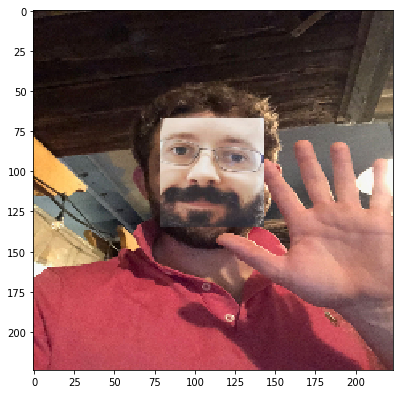

In [21]:
figsize = (5, 9)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

ax.imshow((preprocess_image(timg)));
# plt.show(preprocess_image(timg).astype(np.uint8))

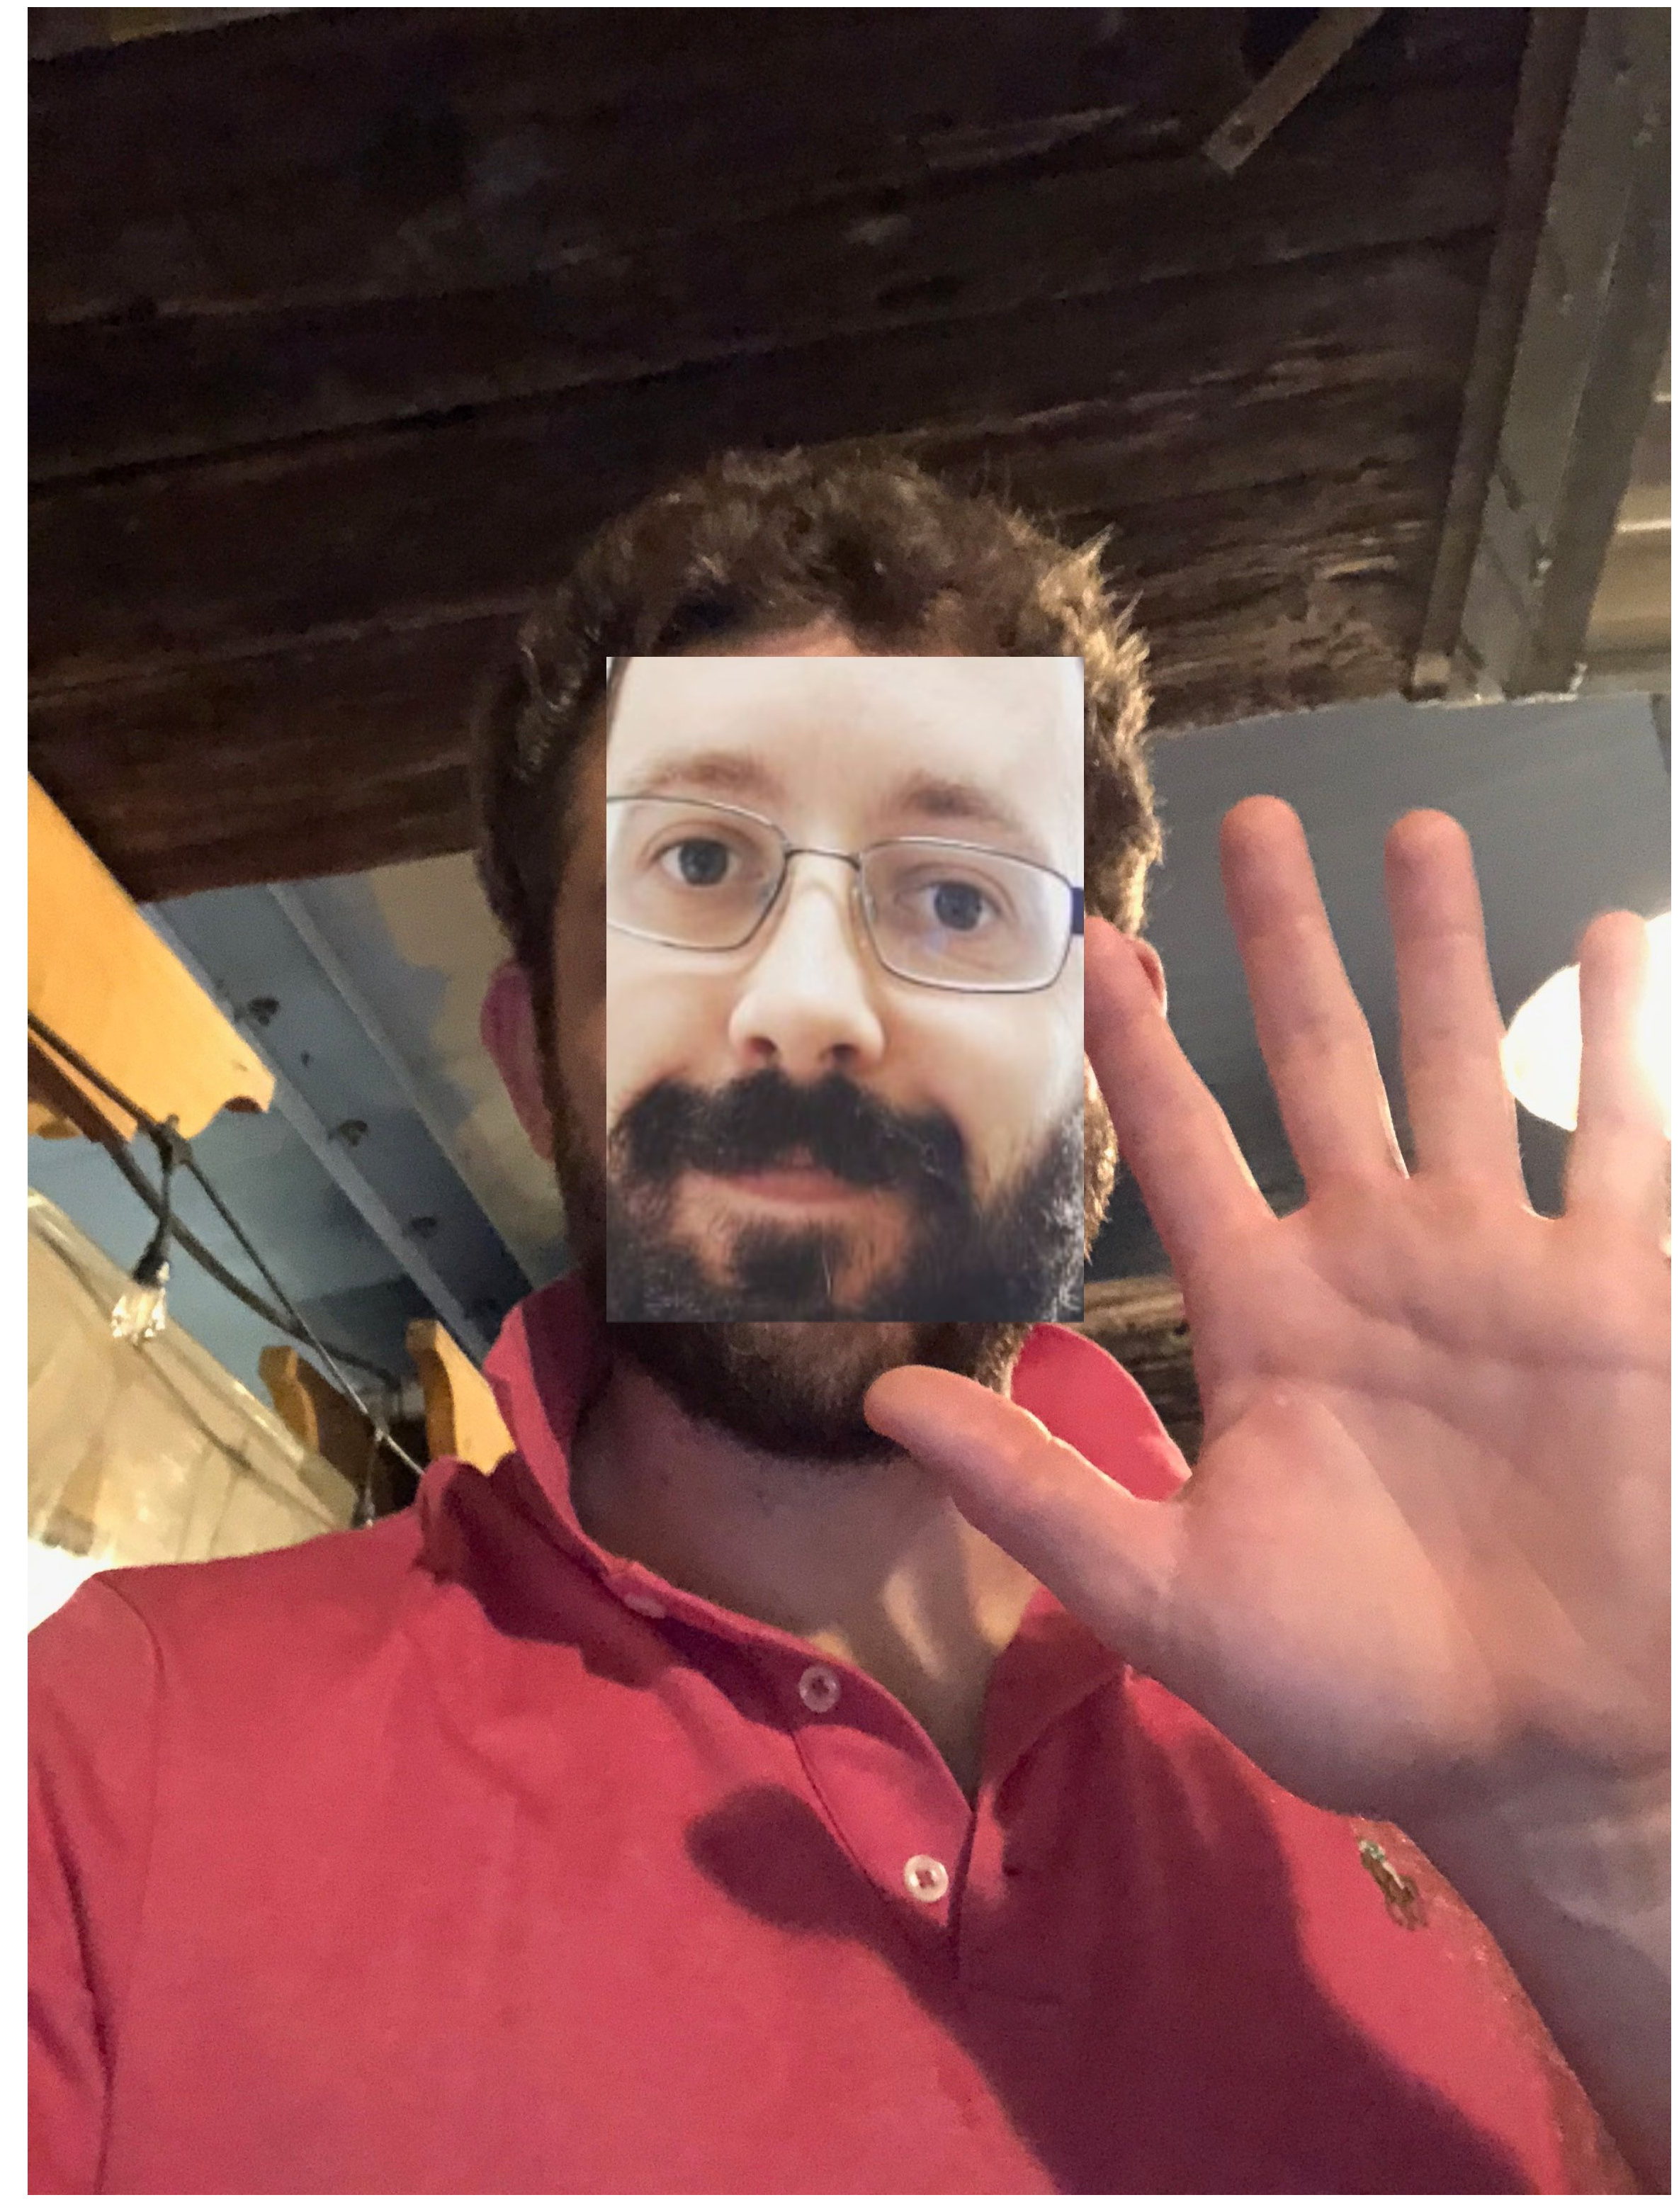

In [16]:
def display_image_in_actual_size(im_path):

    dpi = plt.rcParams['figure.dpi']
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data)

    plt.show()

display_image_in_actual_size(timg)

In [78]:
cropEyes(timg)[0].shape

(26, 34)

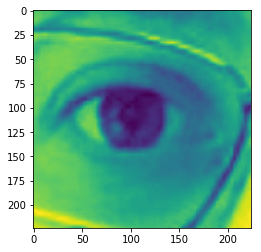

In [80]:
plt.imshow(cropEyes(timg)[0])

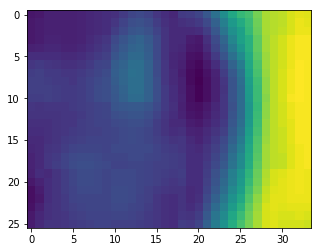

In [77]:
plt.imshow(cropEyes(timg)[1])

In [89]:
def cnnPreprocess(img):
    img = img.astype('float32')
    img /= 255
    img = np.expand_dims(img, axis=2)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
ttimg = cropEyes(timg)[1]

# cropEyes(timg)[0].shape
model.predict(cnnPreprocess(ttimg))

In [3]:
df1 = pd.read_csv('/Users/sproul/Desktop/ds-projects/simple-blink-detector-master/train/dataset.csv')

In [10]:
df1.image.loc[0]

'[178, 179, 181, 180, 175, 171, 170, 168, 162, 154, 153, 154, 153, 152, 144, 137, 138, 135, 133, 136, 139, 143, 147, 151, 152, 154, 152, 150, 154, 161, 168, 173, 181, 184, 184, 180, 179, 178, 175, 173, 172, 169, 166, 155, 150, 148, 147, 148, 145, 141, 134, 128, 124, 124, 126, 129, 136, 142, 150, 155, 159, 160, 164, 168, 171, 174, 183, 186, 187, 186, 186, 184, 178, 173, 171, 169, 158, 153, 154, 149, 141, 137, 133, 130, 131, 126, 124, 124, 123, 121, 125, 131, 141, 150, 158, 164, 169, 174, 177, 180, 189, 192, 187, 180, 175, 170, 164, 160, 159, 158, 150, 145, 144, 139, 130, 127, 123, 120, 115, 111, 109, 110, 109, 108, 113, 121, 128, 137, 147, 155, 164, 173, 182, 189, 196, 199, 184, 172, 163, 160, 156, 149, 139, 131, 130, 124, 124, 122, 118, 115, 107, 100, 100, 96, 92, 91, 89, 90, 97, 107, 115, 124, 134, 145, 157, 170, 182, 192, 199, 202, 174, 163, 153, 146, 141, 139, 140, 141, 140, 140, 145, 138, 122, 110, 98, 91, 87, 87, 88, 88, 87, 86, 89, 94, 104, 112, 124, 137, 151, 164, 176, 186, 197,

---

# test #3

### some eda

In [ ]:
directory = '/Users/sproul/Downloads/All_Image_and_Kernels/data'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# get all the data in the directory split/test, and reshape them
ph_size = 128
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(ph_size, ph_size), 
        batch_size = 5000, 
        seed = 123) 

In [ ]:
images, labels = next(data_all)

In [ ]:
plt.imshow(images[4])
plt.show()

In [ ]:
images[4].shape

In [ ]:
# All photos in this particular dataset are already black and white...
# so, all three matrices below are equivalent

r_img = images[4][:,:,0]
g_img = images[4][:,:,1]
b_img = images[4][:,:,2]

In [ ]:
r_img

In [ ]:
labels[:, 0].sum()

In [ ]:
plt.imshow(b_img, plt.cm.binary)
plt.show()

In [ ]:
# test = images[4].reshape(images[4].shape[0], -1)

In [ ]:
# test.shape

### initial modeling?

In [ ]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

In [ ]:
#reshape into 1D arrays (only for densely connected network)
X = images.reshape(images.shape[0], -1)
y = np.reshape(labels[:,0], (len(labels),1))

In [ ]:
# X[4][:50]

---

In [ ]:
#split model and test sets

# X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
#split validation and training sets from model split

# X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [ ]:
# # NOTES -- DONT RUN!


# dense = models.Sequential()
# dense.add(layers.Dense(16, activation='tanh', input_shape=(pca_dimensions,))) #2 hidden layers
# dense.add(LeakyReLU(alpha=0.05))
# # dense.add(layers.Dense(4, activation='leakyrelu'))
# # dense.add(layers.Dense(8, activation='LeakyRelu'))#,alpha=0.05)
# dense.add(layers.Dense(1, activation='sigmoid'))

# dense.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# # NOTES -- DONT RUN!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [ ]:
# print(X_train.shape)
# print()
# print(X_test.shape)

In [ ]:
dense = Sequential()
dense.add(Dense(16, activation='tanh', input_dim=49152)) #2 hidden layers
dense.add(LeakyReLU(alpha=0.05))
# dense.add(layers.Dense(4, activation='leakyrelu'))
# dense.add(layers.Dense(8, activation='LeakyRelu'))#,alpha=0.05)
dense.add(Dense(1, activation='sigmoid'))

dense.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
dense_fit = dense.fit(X_train, y_train, epochs=30, batch_size=32, 
                      validation_split=.1, verbose=1, ) 

In [ ]:
# classifier.fit(X_train.values, y_train, epochs=50, 
#                validation_split=.1, batch_size=20, verbose=1)

### take two

In [ ]:
pca = PCA(0.99)

In [ ]:
pca.fit(X_train)

In [ ]:
pca_dimensions = pca.n_components_

In [ ]:
pca_dimensions

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# scaler = StandardScaler()

# # Fit on training set only.
# scaler.fit(X_train)

# # Apply transform to both the training set and the test set.
# X_train_img = scaler.transform(X_train)
# X_test_img = scaler.transform(X_test)

In [ ]:
dense = Sequential()
dense.add(Dense(16, activation='tanh', input_dim=421)) #2 hidden layers
dense.add(LeakyReLU(alpha=0.05))
# dense.add(layers.Dense(4, activation='leakyrelu'))
# dense.add(layers.Dense(8, activation='LeakyRelu'))#,alpha=0.05)
dense.add(Dense(1, activation='sigmoid'))

dense.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
dense_fit = dense.fit(X_train_pca, y_train, epochs=30, 
                      batch_size=32, validation_split=.1, verbose=1) 

---

In [ ]:
cnn3 = keras.models.load_model('/Users/sproul/Downloads/testing_model_save')

In [ ]:
def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(224, 224))
    plt.imshow(img)
    img = img_to_array(img)
    
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    return predict

In [ ]:
predictoneimage_cnn(cnn3, '/Users/sproul/Downloads/blurry-city-lights-patrik-duda.jpg')

In [44]:
# width_new = width_old * height_new / height_old
# width_new = (60 * width_old) / height_old

# 26 * 102/34
3546/

49.25

---

## Saving decent models:

In [ ]:
# bcnnG = Sequential()
# bcnnG.add(Conv2D(16, (3, 3), activation='tanh', input_shape=(24, 24, 3)))
# bcnnG.add(MaxPooling2D((2, 2)))
# bcnnG.add(Conv2D(4, (3, 3), activation='tanh'))
# bcnnG.add(MaxPooling2D((2, 2)))
# bcnnG.add(Conv2D(4, (3, 3), activation='tanh'))
# bcnnG.add(MaxPooling2D((2, 2)))
# bcnnG.add(Flatten())
# bcnnG.add(Dense(4, activation='tanh'))
# bcnnG.add(Dense(1, activation='sigmoid'))
# bcnnG.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# cnn_b_search = bcnnG.fit(Xe_train, ye_train, epochs=50, batch_size=32, validation_split=.1)

# Epoch 50/50
# 3488/3488 - loss: 0.2704 - acc: 0.8925 - val_loss: 0.3116 - val_acc: 0.8763